In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

Задание начальных параметров для моделирования процессов

In [71]:
initial_registration_counters = 20  # Количество стоек регистрации на текущий момент
initial_security_lines = 6  # Количество стандартных полос безопасности
initial_baggage_scanners = 6  # Количество рентгеновских сканеров багажа
initial_body_scanners = 6  # Количество сканеров тела

Предлагаемые улучшения

In [72]:

kiosks_added = 20  # Дополнительные киоски для самостоятельной регистрации
advanced_baggage_scanners = 3  # Дополнительные усовершенствованные сканеры багажа
advanced_body_scanners = 1  # Дополнительные усовершенствованные сканеры тела
fast_security_lines_added = 2  # Количество добавленных ускоренных полос досмотра
personal_inspection_rooms_added = 3  # Дополнительные комнаты для личного досмотра
travellators_installed = 4  # Количество установленных травалаторов


Данные о пассажирах на основе первых 9 месяцев 2019 года

In [73]:
total_passengers = 1000000  # Общее количество пассажиров за 9 месяцев
check_in_required_percentage = 50  # Процент пассажиров, которым требуется регистрация
security_screening_required_percentage = 100  # Процент пассажиров, проходящих досмотр

Текущая пропускная способность (пассажиры в час на единицу оборудования)

In [74]:
registration_counter_rate = 20  # Пропускная способность стойки регистрации
kiosk_rate = 30  # Пропускная способность киоска самостоятельной регистрации
baggage_scanner_rate = 50  # Пропускная способность рентгеновского сканера багажа
body_scanner_rate = 50  # Пропускная способность сканера тела
security_line_rate = 100  # Пропускная способность полосы безопасности


Улучшенные показатели пропускной способности

In [75]:

advanced_baggage_scanner_rate1 = 80  # Пропускная способность усовершенствованного сканера багажа
advanced_body_scanner_rate1 = 360  # Пропускная способность усовершенствованного сканера тела
fast_security_line_rate = 150  # Пропускная способность ускоренной полосы досмотра

Функция для моделирования пассажиропотока до и после улучшений

In [76]:
def simulate_passenger_flow(total_passengers, check_in_percentage, initial, improvement, rate, rate1):
    # Рассчитываем текущую и улучшенную пропускную способность
    current_capacity = initial * rate  # Общая пропускная способность до улучшений
    improved_capacity = initial * rate + improvement * rate1  # Общая пропускная способность после улучшений

    # Рассчитываем необходимое количество часов для обработки пассажиров
    hours_needed_current = total_passengers * (check_in_percentage / 100) / current_capacity
    hours_needed_improved = total_passengers * (check_in_percentage / 100) / improved_capacity

    return hours_needed_current, hours_needed_improved


Результаты для различных процессов

C:\Users\user\AppData\Local\Temp\ipykernel_7592\267746613.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
C:\Users\user\AppData\Local\Temp\ipykernel_7592\267746613.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
C:\Users\user\AppData\Local\Temp\ipykernel_7592\267746613.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

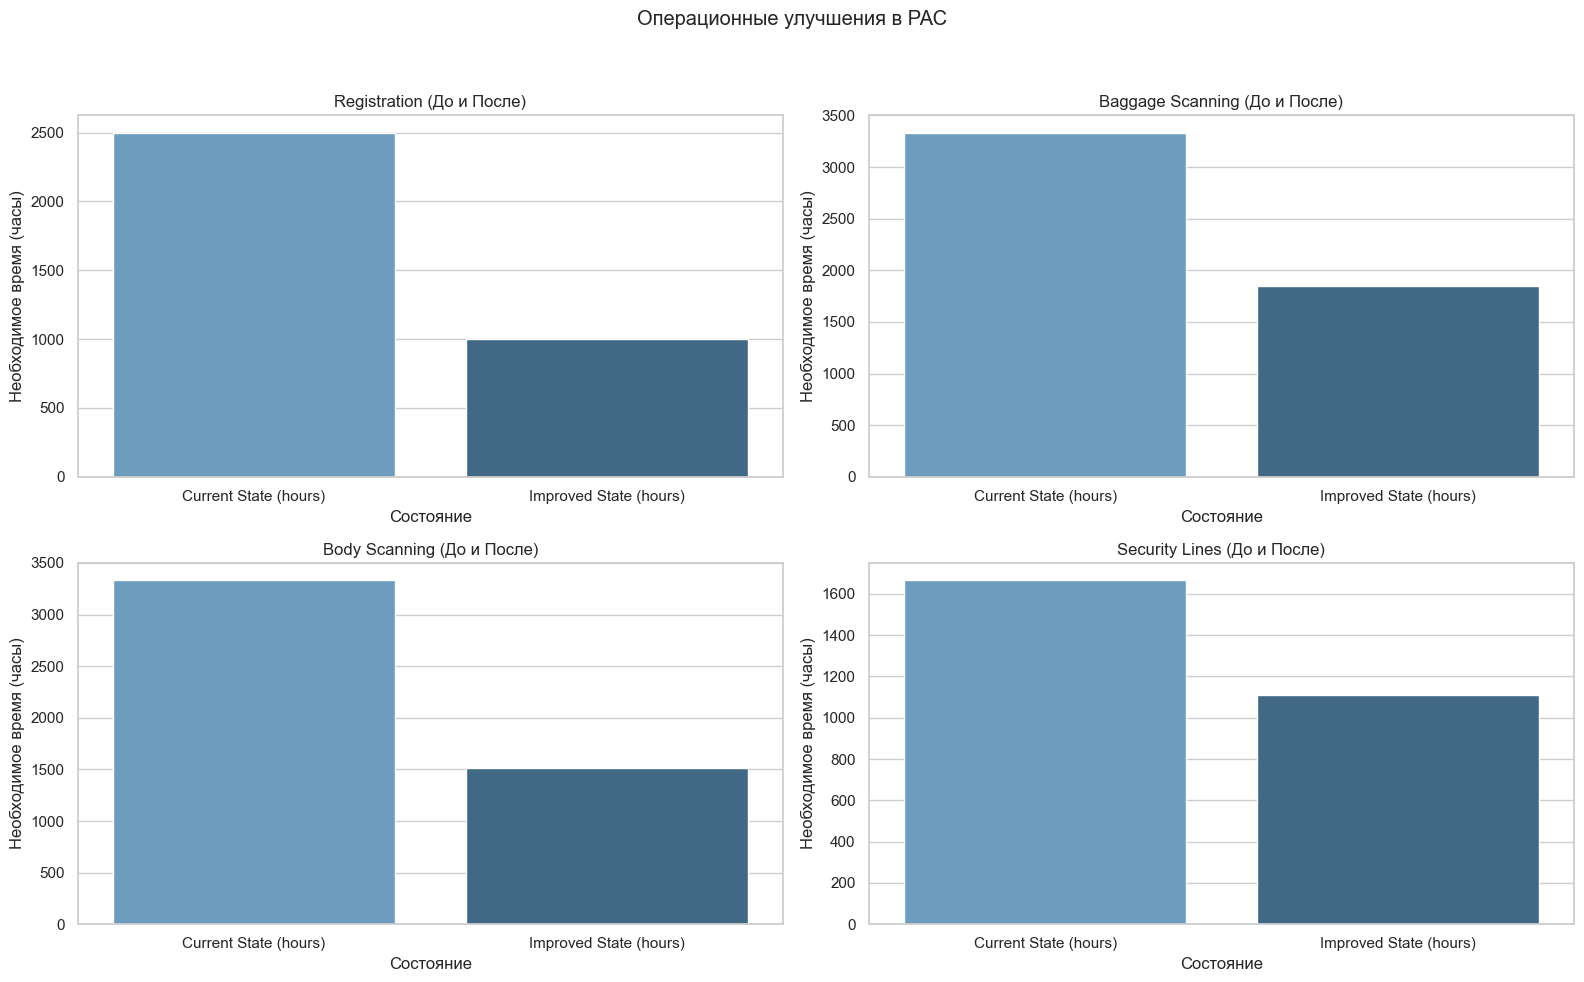

In [77]:
processes = {
    "Registration": (initial_registration_counters, kiosks_added, registration_counter_rate, kiosk_rate),  # Регистрация
    "Baggage Scanning": (initial_baggage_scanners, advanced_baggage_scanners, baggage_scanner_rate, advanced_baggage_scanner_rate1),  # Сканирование багажа
    "Body Scanning": (initial_body_scanners, advanced_body_scanners, body_scanner_rate, advanced_body_scanner_rate1),  # Сканирование тела
    "Security Lines": (initial_security_lines, fast_security_lines_added, security_line_rate, fast_security_line_rate),  # Полосы безопасности
}



# Словарь для хранения результатов моделирования
results = {}

# Итерируем по процессам
for process, (initial, improvement, rate, rate1) in processes.items():
    # Заполняем результаты моделирования для каждого процесса
    results[process] = simulate_passenger_flow(total_passengers, security_screening_required_percentage, initial, improvement, rate, rate1)



# Создание DataFrame для визуализации
results_df = pd.DataFrame(results, index=["Current State (hours)", "Improved State (hours)"]).T

# Визуализация результатов
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Создание сетки графиков
fig.suptitle("Операционные улучшения в РАС")  # Заголовок общей визуализации

# Построение столбчатых диаграмм для каждого процесса
process_list = list(results.keys())
for i, ax in enumerate(axes.flat):
    process = process_list[i]
    sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
    ax.set_title(f"{process} (До и После)")  # Установка заголовка для графика
    ax.set_ylabel("Необходимое время (часы)")  # Подпись оси Y
    ax.set_xlabel("Состояние")  # Подпись оси X

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Регулировка размещения графиков
plt.show()  # Отображение графиков

Построение столбчатых диаграмм для каждого процесса

In [78]:
process_list = list(results.keys())
for i, ax in enumerate(axes.flat):
    process = process_list[i]
    sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
    ax.set_title(f"{process} (До и После)")  # Установка заголовка для графика
    ax.set_ylabel("Необходимое время (часы)")  # Подпись оси Y
    ax.set_xlabel("Состояние")  # Подпись оси X

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Регулировка размещения графиков
plt.show()  # Отображение графиков


C:\Users\user\AppData\Local\Temp\ipykernel_7592\3585872086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
C:\Users\user\AppData\Local\Temp\ipykernel_7592\3585872086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.loc[process].index, y=results_df.loc[process].values, ax=ax, palette="Blues_d")  # Построение графика
C:\Users\user\AppData\Local\Temp\ipykernel_7592\3585872086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<Figure size 640x480 with 0 Axes>

Таблица детализированных результатов

In [79]:
results_df = results_df.reset_index()  # Сброс индексов для удобства
results_df.columns = ["Process", "Current State (hours)", "Improved State (hours)"]  # Переименование колонок
print("Детализированные результаты моделирования:")
print(results_df)  # Печать таблицы результатов

Детализированные результаты моделирования:
            Process  Current State (hours)  Improved State (hours)
0      Registration            2500.000000             1000.000000
1  Baggage Scanning            3333.333333             1851.851852
2     Body Scanning            3333.333333             1515.151515
3    Security Lines            1666.666667             1111.111111


Визуализация общей эффективности улучшений

In [80]:
def calculate_efficiency_gain(before, after):
    # Расчет прироста эффективности
    return ((before - after) / before) * 100

results_df["Efficiency Gain (%)"] = calculate_efficiency_gain(
    results_df["Current State (hours)"], results_df["Improved State (hours)"]
)

Визуализация прироста эффективности

C:\Users\user\AppData\Local\Temp\ipykernel_7592\3150006442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Process", y="Efficiency Gain (%)", data=results_df, palette="coolwarm")  # Построение графика прироста эффективности


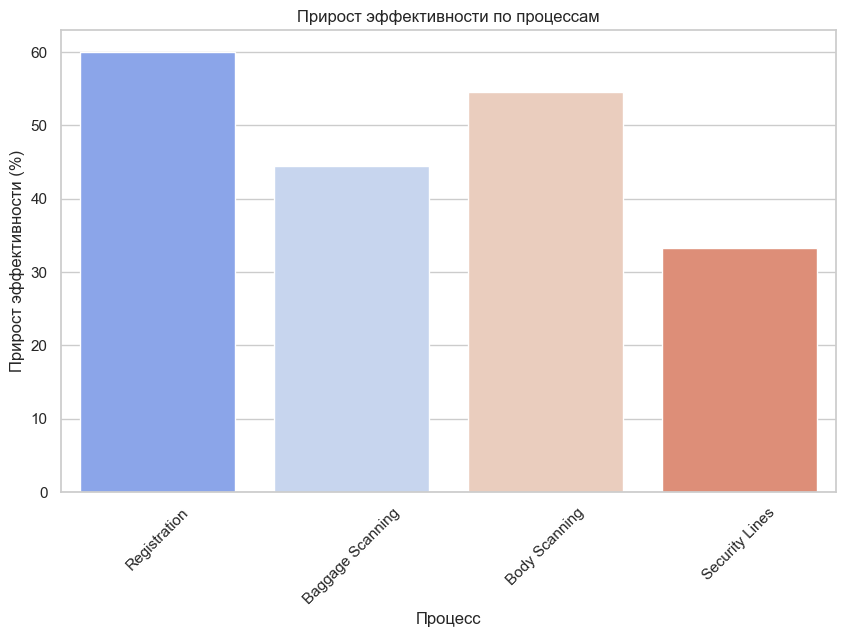

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Process", y="Efficiency Gain (%)", data=results_df, palette="coolwarm")  # Построение графика прироста эффективности
plt.title("Прирост эффективности по процессам")  # Заголовок графика
plt.ylabel("Прирост эффективности (%)")  # Подпись оси Y
plt.xlabel("Процесс")  # Подпись оси X
plt.xticks(rotation=45)  # Поворот подписей оси X
plt.show()  # Отображение графика